In [35]:
import PyPDF2
from PyPDF2 import PdfFileReader

import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize

import spacy
from spacy.lang.es import Spanish
from spacy.lang.es.stop_words import STOP_WORDS

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
# PDF EXTRACTION OF DATA

def extract_pdf(paths):
    
    all_parties=[]
    for path in paths:
        party_pdf =  open(path, mode='rb')
        party = PyPDF2.PdfFileReader(party_pdf)
        pages = party.getNumPages()
        all_text=[]
        for page in range(pages):
            info=party.getPage(page)
            text=info.extractText()
            text_clean=re.sub('\n', '', text)
            text_clean=re.sub("˜", "fi", text_clean)
            text_clean=re.sub("-", "", text_clean)
            #text_clean=re.sub("á", "a", text_clean)
            #text_clean=re.sub("é", "e", text_clean)
            #text_clean=re.sub("í", "i", text_clean)
            #text_clean=re.sub("ó", "o", text_clean)
            #text_clean=re.sub("ú", "u", text_clean)
            all_text.append(text_clean)
        all_parties.append(str(all_text))
        
    return all_parties

In [3]:
# Data Programas Electorales
path_list=['data/podemos.pdf','data/psoe.pdf','data/ciudadanos.pdf','data/pp.pdf','data/vox.pdf']
parties=extract_pdf(path_list)


In [27]:
#def prepare_data(text):
    # Clean-Up
   # text=re.sub(r"\d{1,}", "", text)
   # text=re.sub(r'[-,.)(:%/;»«´˚]', "", text)
   # text=re.sub("'", "", text)
   # text=re.sub("˜", "fi", text)
    #text=re.sub("...", "", text)
    #text=re.sub(r'[^a-zA-Z-]', " ", text)
    # Tokenize

def spacy_tokenizer(sentence):
    nlp=spacy.load('es')
    parser = Spanish()
    spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
    STOPWORDS=list(spacy_stopwords)
    STOPWORDS.extend(('y','a','u','o','e'))
    tokens = parser(sentence)
    filtered_tokens = []
    for word in tokens:
        lemma = word.lemma_.lower().strip()
        lemma=re.sub("á", "a", lemma)
        lemma=re.sub("é", "e", lemma)
        lemma=re.sub("í", "i", lemma)
        lemma=re.sub("ó", "o", lemma)
        lemma=re.sub("ú", "u", lemma)
        lemma=re.sub("ñ", "n", lemma)
        if lemma not in STOPWORDS and re.search('^[a-zA-Z]+$', lemma):
            filtered_tokens.append(lemma)
    return filtered_tokens



In [75]:

spacy_tokenizer(parties[1])[:15]
type(parties)

list

In [52]:
text1 = ['Viva España, viva la caza y los toros. Fuera los comunistas, que se respeten las tradiciones de este pais']
text2 = ['Quiero que haya mas igualdad en España y mas derechos y servicios sociales para las personas humildes, que los ricos paguen mas y los derechos sociales se respeten']
party_names=['Podemos','Psoe','Ciudadanos', 'PP','Vox']


In [74]:
# min_df=0.15, 

def tfdif_vect(parties, text):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
    tfidf_matrix = tfidf_vectorizer.fit_transform(parties)
    text_transformed=tfidf_vectorizer.transform(text)
    return cosine_similarity(tfidf_matrix, text_transformed)


similarities=tfdif_vect(parties, text1)
#tfidf_matrix.shape





array([[0.02293484],
       [0.0347194 ],
       [0.05596442],
       [0.03200755],
       [0.06310324]])

In [87]:
similarities1

array([[0.02293484],
       [0.0347194 ],
       [0.05596442],
       [0.03200755],
       [0.06310324]])

In [79]:
similarities1=similarities

In [90]:
def to_percent(data):
    for i in data:
        i=(i/(data.sum()))*100
        return data
    
y=to_percent(similarities1)
y

array([[0.02293484],
       [0.0347194 ],
       [0.05596442],
       [0.03200755],
       [0.06310324]])

In [92]:
def to_percent(x):
        x=(x/(x.sum()))*100
        return x
    
y=to_percent(similarities1)
y

array([[10.98783229],
       [16.63368329],
       [26.811943  ],
       [15.33446994],
       [30.23207148]])

In [82]:
pd.DataFrame(similarities1/float(np.sum(similarities1))).applymap(lambda x: '{:.2%}'.format(similarities1)).values

TypeError: ('unsupported format string passed to numpy.ndarray.__format__', 'occurred at index 0')

<function matplotlib.pyplot.show(*args, **kw)>

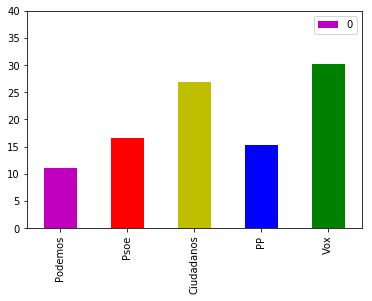

In [96]:
%matplotlib inline
df = pd.DataFrame(y, index=party_names)

#df.plot(kind='bar', colors = 'rgbkymc')
df.plot(kind='bar', colors = 'mrybg', label=None)
plt.ylim((0,40))
plt.show

In [81]:
similarities


array([[0.02293484],
       [0.0347194 ],
       [0.05596442],
       [0.03200755],
       [0.06310324]])

In [15]:
df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names())
df

,abalos,abandonar,abanicar,abar,abaratandose,abaratar,abarcar,abastecimiento,abocar,abogar,...,world,xenofobia,xenofobo,xi,xxi,yemen,yihadista,york,zapatero,zona
0,0.000000,0.009351,0.00000,0.00000,0.002803,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.006785,0.00000,0.000000,0.00000,0.004523,0.037548
1,0.000000,0.008931,0.00125,0.00125,0.000000,0.000000,0.002016,0.000000,0.00125,0.00125,...,0.002499,0.006049,0.002499,0.00125,0.009073,0.00125,0.002510,0.00125,0.004032,0.011716
2,0.000000,0.010771,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
3,0.002663,0.001269,0.00000,0.00000,0.000000,0.002663,0.002149,0.002663,0.00000,0.00000,...,0.000000,0.002149,0.000000,0.00000,0.000000,0.00000,0.001784,0.00000,0.000000,0.023187
4,0.000000,0.023251,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.016339,0.00000,0.000000,0.000000


In [14]:
tfidf_matrix

<5x5551 sparse matrix of type '<class 'numpy.float64'>'
	with 10554 stored elements in Compressed Sparse Row format>

In [10]:
cosine_similarity(tfidf_matrix, text1_transformed)

array([[0.35022504],
       [0.35389554],
       [0.4073368 ],
       [0.27085826],
       [0.23308367]])

In [11]:
dist = 1 - cosine_similarity(tfidf_matrix, text1_transformed)
dist

array([[0.64977496],
       [0.64610446],
       [0.5926632 ],
       [0.72914174],
       [0.76691633]])

["['PROGRAMA DE PODEMOS para un nuevo país', '', 'ÍndicePrograma para un nuevo país ............................... 5Horizonte Verde y Nuevo Modelo Industrial ................... 7Horizonte Morado y Economía de los Cuidados ............... 21Horizonte Digital y Nueva Economía ......................... 31Garantías Democráticas y de Ciudadanía ..................... 45Garantías de Justicia Laboral y Pensiones .................... 63Garantías de Justicia Social ................................. 77Garantías de Justicia Fiscal ................................. 91Garantías de Justicia Territorial .............................. 99', '', 'PODEMOS.Programa para un nuevo paísEn las elecciones del 28 de abril hay tres opciones: cualquiera de los tres partidos de Aznar (PP, Ciudadanos y VOX, que son básicamente lo mismo), el PSOE o Unidas Podemos.Los tres de Aznar quieren llevarnos cuarenta años al pasado en libertades civiles y derechos de las mujeres y comparten idéntico programa económico: aumen

In [ ]:
from sklearn.model_selection import train_test_split

y=party_names[0]
x=parties[0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score

logistic = linear_model.LogisticRegression()
logistic.fit(x_train, y_train)

y_pred_train = logistic.predict(x_train)
print('Accuracy:',sklearn.metrics.accuracy_score(y_train, y_pred_train))
print('COnfusion:', sklearn.metrics.confusion_matrix(y_train, y_pred_train))

y_pred = logistic.predict(x_test)
print('Accuracy:',sklearn.metrics.accuracy_score(y_test, y_pred))
print('COnfusion:', sklearn.metrics.confusion_matrix(y_test, y_pred))